###  Cargamos las librerias necesarias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
plt.rcParams["figure.figsize"]=15,10

## Cargamos los datos

In [2]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data = pd.read_csv(url, error_bad_lines=False)
data = data.rename(columns={"Fecha": "Item"}) #Le cambiamos el nombre a la columna
data

,Item,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20
0,Casos nuevos con sintomas,1.0,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,...,2219.0,2371.0,1985.0,1444.0,1400.0,1949.0,2125.0,1624.0,1615.0,1599.0
1,Casos totales,1.0,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,...,312029.0,315041.0,317657.0,319493.0,321205.0,323698.0,326539.0,328846.0,330930.0,333029.0
2,Casos recuperados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fallecidos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6881.0,6979.0,7024.0,7069.0,7186.0,7290.0,8347.0,8445.0,8503.0,8633.0
4,Casos activos,1.0,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,...,24008.0,24166.0,24077.0,23205.0,21934.0,21107.0,21378.0,20952.0,20633.0,20404.0
5,Casos nuevos sin sintomas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,405.0,389.0,451.0,244.0,186.0,367.0,545.0,373.0,359.0,340.0
6,Casos nuevos totales,1.0,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,...,2755.0,3012.0,2616.0,1836.0,1712.0,2475.0,2840.0,2185.0,2082.0,2099.0
7,Casos activos por FD,1.0,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,...,44263.0,43059.0,41658.0,40100.0,39162.0,39157.0,38450.0,36999.0,35398.0,34472.0
8,Casos activos por FIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24008.0,24166.0,24077.0,23205.0,21934.0,21107.0,21378.0,20952.0,20633.0,20404.0
9,Casos recuperados por FIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,281140.0,283896.0,286556.0,289219.0,292085.0,295301.0,296814.0,299449.0,301794.0,303992.0


In [3]:
fallecidos  = data[data["Item"]=="Fallecidos"].values.tolist()[0][1:]
contagiados = data[data["Item"]=="Casos totales"].values.tolist()[0][1:]
df_letalidad = pd.DataFrame({
    'fecha': data.columns[1:],
    'contagiados': contagiados,
    'fallecidos': fallecidos
})
df_letalidad["letalidad"] = (df_letalidad["fallecidos"] / df_letalidad["contagiados"]) * 100

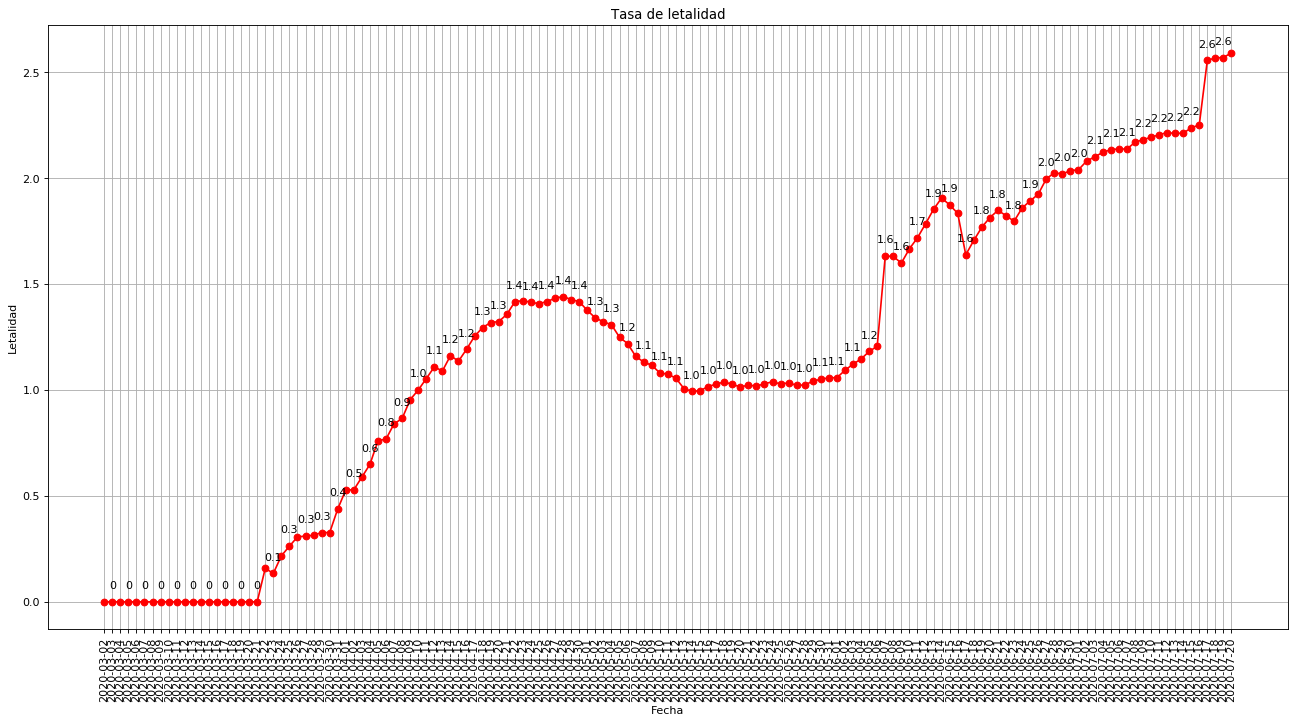

In [4]:
def labelonbars(X, Y):
    n       = len(X)
    aux = 0
    for i in range (n):
        if float(Y[i]) == 0.0 :
            number = "0"
        else:
            number = '{0:.1f}'.format(float(Y[i])).replace(',', '.')
            
        if aux == 1:    
            plt.annotate(
                number, xy=(X[i], Y[i]),
                xytext =(0, 10),
                textcoords="offset points",
                ha ='center', va='bottom',
                size='10')
            aux = 0
        else: 
            aux = 1
        
        

Y            = df_letalidad["letalidad"].values.tolist()
X            = data.columns[1:]
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, Y, 'ro-')
labelonbars(X, Y)
plt.xlabel('Fecha')
plt.ylabel('Letalidad')
plt.title('Tasa de letalidad')
plt.grid()
plt.xticks(X, rotation='vertical')
plt.show()

# Tasa de letalidad por regiones

In [5]:
url_region  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv"
data_region = pd.read_csv(url_region)
data_region

,Region,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
0,2020-03-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2020-03-04,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,2020-03-05,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,2020-03-06,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,2020-03-07,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2020-07-16,2840.0,7353.0,12500.0,1734.0,4361.0,15068.0,242572.0,8987.0,7462.0,3080.0,8994.0,3666.0,796.0,2564.0,61.0,1589.0,323698.0
136,2020-07-17,2936.0,7451.0,12716.0,1736.0,4486.0,15261.0,244073.0,9163.0,7603.0,3095.0,9150.0,3687.0,820.0,2629.0,69.0,1592.0,326539.0
137,2020-07-18,3012.0,7557.0,12907.0,1817.0,4634.0,15406.0,245161.0,9249.0,7683.0,3193.0,9300.0,3702.0,825.0,2662.0,69.0,1600.0,328846.0
138,2020-07-19,3056.0,7627.0,13109.0,1857.0,4792.0,15589.0,245983.0,9366.0,7817.0,3222.0,9441.0,3724.0,833.0,2761.0,69.0,1606.0,330930.0


In [6]:
date = str(datetime.date.today())

In [7]:
contagiados_total_region = data_region[data_region["Region"]== date].values.tolist()[0][1:]
regiones = data_region.columns.tolist()[1:]

In [8]:
df_letalidad_regiones = pd.DataFrame({
    'Region': regiones,
    'contagiados': contagiados_total_region
})

In [9]:
url_fallecidos_region  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo_T.csv"
data_fallecidos_region = pd.read_csv(url_fallecidos_region)
data_fallecidos_region = data_fallecidos_region.rename(columns={'Region':'Fecha'})
data_fallecidos_region
fallecidos_region = data_fallecidos_region[data_fallecidos_region["Fecha"]==date].values.tolist()[0][1:]

In [10]:
df_letalidad_regiones["Fallecidos"] = fallecidos_region

In [11]:
df_letalidad_regiones["Letalidad"] = (df_letalidad_regiones["Fallecidos"]/df_letalidad_regiones["contagiados"]) * 100
df_letalidad_regiones

,Region,contagiados,Fallecidos,Letalidad
0,Arica y Parinacota,3188.0,40.0,1.254705
1,Tarapacá,7761.0,144.0,1.855431
2,Antofagasta,13226.0,293.0,2.215333
3,Atacama,1895.0,9.0,0.474934
4,Coquimbo,4918.0,54.0,1.098007
5,Valparaíso,15771.0,427.0,2.707501
6,Metropolitana,246946.0,7053.0,2.856090
7,O’Higgins,9472.0,183.0,1.932010
8,Maule,7884.0,131.0,1.661593
9,Ñuble,3250.0,54.0,1.661538


In [12]:
X = regiones
Y = df_letalidad_regiones["Letalidad"].tolist()

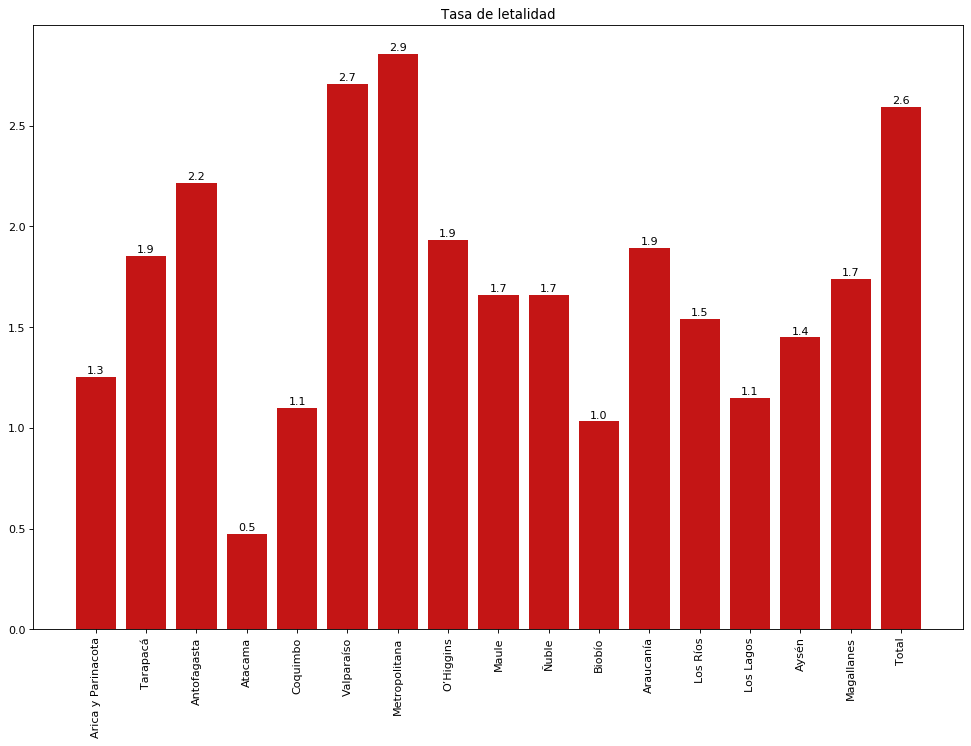

In [13]:
def labelonbars(X, Y):
    n       = len(X)
    aux = 0
    for i in range (n):
        number = '{0:.1f}'.format(float(Y[i])).replace(',', '.')
        plt.annotate(
                number, xy=(X[i], Y[i]),
                xytext =(0, 1),
                textcoords="offset points",
                ha ='center', va='bottom',
                size='10')    
            
plt.figure(figsize=(15, 10), dpi=80)
plt.bar(X, Y, color='#C41515')
plt.title("Tasa de letalidad")
labelonbars(X, Y)
plt.xticks(X, rotation='vertical')
plt.show()